In [1]:
include("intro.jl")

using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using HNProcess
using DataRefine
using PartitioningData

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



In [2]:

#=
template = [
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
]
=#

i1 = [
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
]

i2 = [
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
]

i3 = [
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    1 1 1 1 -1 -1 -1 -1;
    1 1 1 1 -1 -1 -1 -1;
    1 1 1 1 -1 -1 -1 -1;
    1 1 1 1 -1 -1 -1 -1;
]

i4 = [
    1 1 -1 -1 1 1 -1 -1;
    1 1 -1 -1 1 1 -1 -1;
    1 1 -1 -1 1 1 -1 -1;
    1 1 -1 -1 1 1 -1 -1;
    -1 -1 1 1 -1 -1 1 1;
    -1 -1 1 1 -1 -1 1 1;
    -1 -1 1 1 -1 -1 1 1;
    -1 -1 1 1 -1 -1 1 1;
]

images = Dict(
    "i1"  => [
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
    ],
    
    "i2" => [
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
    ],
    
    "i3"  => [
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
    ],
    
    "i4" => [
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
    ],

    "i5" => [
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
    ],

    "i6" => [
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        1 1 -1 -1 1 1 -1 -1;
    ] 
    
)

Dict{String, Matrix{Int64}} with 6 entries:
  "i5" => [1 1 … -1 -1; 1 1 … -1 -1; … ; -1 -1 … 1 1; -1 -1 … 1 1]
  "i4" => [1 1 … -1 -1; 1 1 … -1 -1; … ; -1 -1 … 1 1; -1 -1 … 1 1]
  "i3" => [-1 -1 … 1 1; -1 -1 … 1 1; … ; 1 1 … -1 -1; 1 1 … -1 -1]
  "i1" => [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1]
  "i2" => [-1 -1 … 1 1; -1 -1 … 1 1; … ; -1 -1 … 1 1; -1 -1 … 1 1]
  "i6" => [1 1 … -1 -1; -1 -1 … 1 1; … ; -1 -1 … 1 1; 1 1 … -1 -1]

In [3]:
println(keys(images))
dot_products = []
p = [i for i in keys(images)]
ims = [images[i] for i in keys(images)]
for i in range(1,length(ims) - 1)
    for k in range(i+1,length(ims))
        println(p[i])
        println(p[k])
        push!(dot_products, dot(vec(ims[i]),vec(ims[k])))
    end
end
dot_products

["i5", "i4", "i3", "i1", "i2", "i6"]
i5
i4
i5
i3
i5
i1
i5
i2
i5
i6
i4
i3
i4
i1
i4
i2
i4
i6
i3
i1
i3
i2
i3
i6
i1
i2
i1
i6
i2
i6


15-element Vector{Any}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [4]:
sim_time = 1
steps = 500
parameters = Dict{String, Any}(
    "images" => [images[i] for i in keys(images)],
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(2,2,-1)]
)

Dict{String, Any} with 8 entries:
  "images"          => [[1 1 … -1 -1; 1 1 … -1 -1; … ; -1 -1 … 1 1; -1 -1 … 1 1…
  "scaling"         => 1.0
  "iterations"      => 100
  "steps"           => 500
  "num_agitations"  => 1
  "initial_stimuli" => [(2, 2, -1)]
  "sim_time"        => 1
  "delta"           => -0.002

┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs ~/.julia/packages/SimpleWeightedGraphs/Ab8wv/src/simpleweightedgraph.jl:182


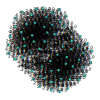

In [5]:
# Graph Checker
graph = get_HN_graph(parameters["images"],-1.0)

elabels = [weights(graph)[e.src, e.dst] for e in edges(graph)]

# Plot with edge labels
gplot(graph, 
      nodelabel=1:nv(graph), 
      edgelabel=round.(elabels, digits=2),)

In [6]:
res = HN_Solver_Traj(parameters, true)
save_trajectories(res[2], "8by8","len6_t2")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
File 8by8_1_len6_t2.dat is generated


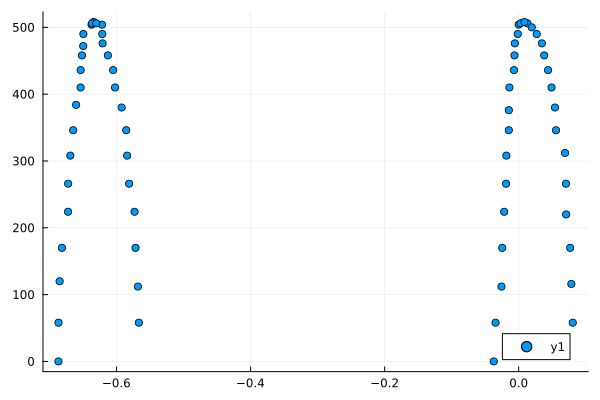

In [7]:
HN_cut_plotter(parameters, res[1])

In [13]:

rots = iterative_rotater_state(res[1], parameters);
for st in rots
    if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
        -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
        println("FOUND")
        pretty_table(reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
    end
end

FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3

In [9]:
sol_finder(res[1],parameters)

FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3

2-element Vector{Any}:
 (Int8[-1, -1, -1, -1, 1, 1, 1, 1, -1, -1  …  -1, -1, 1, 1, 1, 1, -1, -1, -1, -1], [-0.9137716717248758, -0.892004699357301, -0.9884793893503558, -0.9359307701966189, -0.8922504114106218, -0.9697928327836807, -0.9497381644583895, -0.977583715448695, -0.9686092085066775, -0.9628243510372658  …  -0.8936460387857963, -0.9247183867652633, -0.9844082683535027, -0.9189323854273463, -0.8821167762837496, -0.9542258247472866, -0.9070450002044135, -0.9815804980759051, -0.9766431643592335, -0.987367239827738])
 (Int8[-1, -1, -1, -1, 1, 1, 1, 1, -1, -1  …  -1, -1, 1, 1, 1, 1, -1, -1, -1, -1], [-0.264209043670804, -0.24244207130322915, -0.338916761296284, -0.28636814214254724, -0.24268778335654995, -0.3202302047296093, -0.30017553640431816, -0.32802108739462366, -0.3190465804526057, -0.313261722983194  …  -0.24408341073172446, -0.2751557587111917, -0.33484564029943087, -0.2693697573732745, -0.2325541482296778, -0.3046631966932152, -0.25748237215034186, -0.3320178700218337, -0

In [12]:

conv = 0
elp = @elapsed begin
    for i in 1:100
        r = HN_Solver_Traj(parameters)
        if (reshape(r[1][1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r[1][1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            conv +=1 
        else
            println("FAILED AT $i")
            save_trajectories(r[2], "8by8_len_6","iter_$i")
            pretty_table(reshape(r[1][1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
        end
    end
end
println(conv)
println("took $elp seconds")

FAILED AT 8
File 8by8_len_6_1_iter_8.dat is generated
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │      1 │      1 │     -1 │      1 │      1 │
│     -1 │      1 │     -1 │     -1 │      1 │      1 │      1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │      1 │     -1 │     -1 │
│     -1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │      1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
FAILED AT 11
File 8by8_len_6_1_iter_11.dat is generated
┌─

In [70]:
r = HN_og(parameters)

pretty_table(reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)))
conv = 0
elp = @elapsed begin
    for i in 1:1000
        r = HN_og(parameters)
        if (reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            conv +=1 
        end
    end
end
println(conv)
println("took $elp seconds")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
447
took 20.8079185 seconds


In [34]:
r = HN_Solver(parameters)

pretty_table(reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))

conv = 0
twos = 0 
others = 0
elp = @elapsed begin
    for i in 1:1000
        r = HN_Solver(parameters)
        sol_count = 0 
        rots = iterative_rotater_state(r,parameters)
        for st in rots
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                sol_count +=1 
            end
        end
        if sol_count > 0
            conv += 1
        end
        if sol_count == 2
            twos += 1 
        end
        if sol_count > 2
            others += 1 
        end
    end
end
println("Number of multiple convs: $(conv)")
println("Number of multiple twos: $(twos)")
println("Number of more than two sols: $(others)")
println("took $elp seconds")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
Number of multiple convs: 994
Number of multiple twos: 887
Number of more than two sols: 0
took 21.347621334 sec

Notes: 
- Converges very often, prob of not decreases as N increases.
- Multiple solutions not guarenteed, but highly likely
